In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
data = load_iris()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
X = data["data"].copy()[ :, 2:4]# 2 columns to allow straightforward decision boundary visualization
y = data["target"].copy()

stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in stratSplit.split(X, y):
    X_train = X[train_index]
    X_test = X[test_index]
    
    y_train = y[train_index]
    y_test = y[test_index]

In [8]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.xlabel(data["feature_names"][2])
plt.ylabel(data["feature_names"][3])
plt.title("Petal width and length for iris train set")
plt.show()

In [45]:
def plotDecisionBoundary(mod, X, y, X_train, y_train, title, ax):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    xx_r = xx.ravel()
    yy_r = yy.ravel()
    Z = mod.predict(np.c_[xx_r, yy_r])

    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
    ax.scatter(X[:, 0],X[:, 1],c=y, cmap=plt.cm.cool)
    ax.set_xlabel(data["feature_names"][2])
    ax.set_ylabel(data["feature_names"][3])
    ax.set_title(title+f' test accuracy: {round(mod.score(X,y),2)}')
    plt.xlim(x_min,x_max)
    plt.ylim(y_min,y_max)

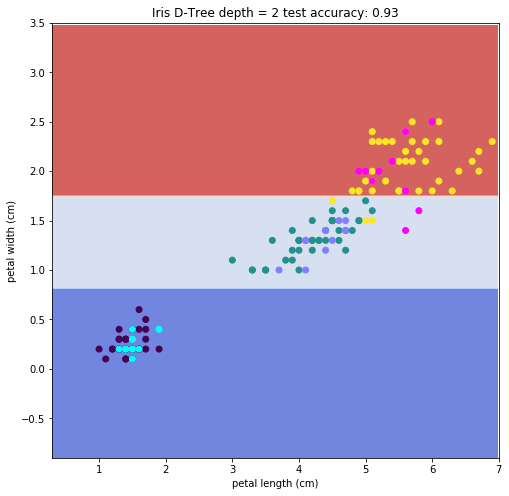

In [46]:
fig = plt.figure(figsize=(8,8))
max_depth = 2
ax = fig.add_subplot(1,1,1)
dt_clf = DecisionTreeClassifier(max_depth = max_depth, random_state = 1)
dt_clf.fit(X_train, y_train)
plotDecisionBoundary(dt_clf, X_test, y_test, X_train, 
                     y_train, title=f"Iris D-Tree depth = {max_depth}", ax=ax)

plt.show()

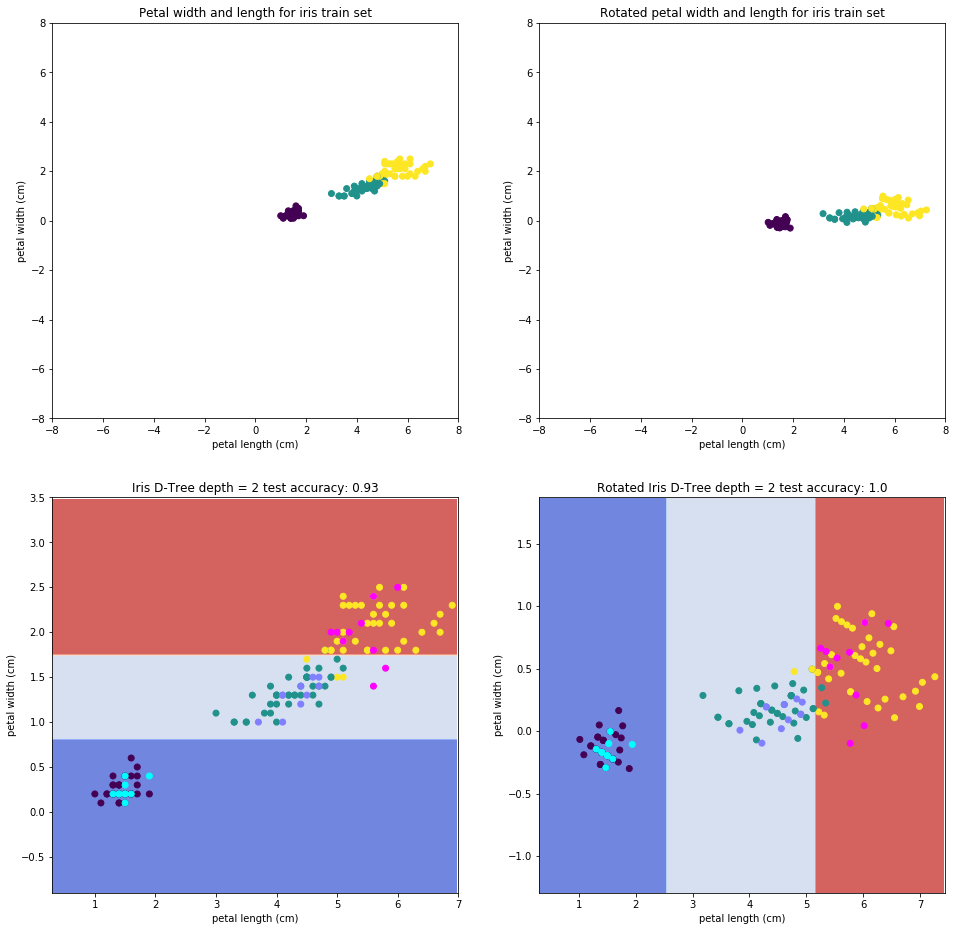

In [47]:
def applyRotation(x, y, thetaDeg):
    thetaRad = thetaDeg*np.pi/180
    return np.c_[x*np.cos(thetaRad) - y*np.sin(thetaRad), x*np.sin(thetaRad) + y*np.cos(thetaRad)]
theta = -15
X_rotated = applyRotation(X[:, 0], X[:, 1], theta)
for train_index, test_index in stratSplit.split(X_rotated, y):
    X_train_rot = X_rotated[train_index]
    X_test_rot = X_rotated[test_index]
    
    y_train_rot = y[train_index]
    y_test_rot = y[test_index]
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(221)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.xlabel(data["feature_names"][2])
plt.ylabel(data["feature_names"][3])
plt.title("Petal width and length for iris train set")
plt.xlim(-8,8)
plt.ylim(-8,8)
ax = fig.add_subplot(222)
plt.scatter(X_train_rot[:, 0], X_train_rot[:, 1], c=y_train_rot)
plt.xlabel(data["feature_names"][2])
plt.ylabel(data["feature_names"][3])
plt.title("Rotated petal width and length for iris train set")
plt.xlim(-8,8)
plt.ylim(-8,8)

ax = fig.add_subplot(223)
max_depth = 2
dt_clf = DecisionTreeClassifier(max_depth = max_depth, random_state = 1)
dt_clf.fit(X_train, y_train)
plotDecisionBoundary(dt_clf, X_test, y_test, X_train, 
                     y_train, title=f"Iris D-Tree depth = {max_depth}", ax=ax)

ax = fig.add_subplot(224)
max_depth = 2
dt_clf = DecisionTreeClassifier(max_depth = max_depth, random_state = 1)
dt_clf.fit(X_train_rot, y_train_rot)
plotDecisionBoundary(dt_clf, X_test_rot, y_test_rot, X_train_rot, 
                     y_train_rot, title=f"Rotated Iris D-Tree depth = {max_depth}", ax=ax)

plt.show()